In [1]:
import os
import re
import pandas as pd
import seaborn as sns
from Bio import *
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd

In [2]:
def find_key_gene_db_name(filtered_intergenic, startstopdict, position):
    found = 0
    for key in startstopdict.keys(): 
        array = startstopdict[key]
        if position in array: 
            found = 1
            protein_annotation = filtered_intergenic.loc[key, 'protein annotation']
            db_name = filtered_intergenic.loc[key, 'db name']
    if found == 0: 
        protein_annotation = 'no gene'
        db_name = 'no gene'
    return protein_annotation, db_name

def filter_snippy_df(morphology_reference, morphology_reads, reference_phage, inter_or_intra): 
    myo_snippy_df = snippy_df[(snippy_df.loc[:, 'morphology reference'] == morphology_reference) & (snippy_df.loc[:, 'morphology read'] == morphology_reads)]
    pa10myo_snippy_df = myo_snippy_df[myo_snippy_df.loc[:, 'reference'] == reference_phage]
    pa10myo_snippy_df = pa10myo_snippy_df[pa10myo_snippy_df.loc[:, 'inter or intra'] == inter_or_intra]
    return pa10myo_snippy_df

def filter_intergenic_df(phage): 
    df = gbk_df[gbk_df.loc[:, 'phage'] == phage]
    return df
#filtered_snippy = filter_snippy_df('Myoviridae', 'Myoviridae', 'Pa10', 'inter')

In [6]:
phage_order = [
    'Pa15',
 'Pa28',
'Pa36',
 'Pa29',
 'Pa22',
 'Pa6',
 'Pa18',
 'Pa25',
'Pa3',
 'Pa10',
 'Pa12',
 'Pa21',
 'Pa24',
 'Pa2',
 'Pa33',
 'Pa35']

In [39]:
snippy_df = pd.read_csv(r'C:\Users\Halewijn\OneDrive\Documenten\third year\BEP\thesis\mutational analysis\final_snippy_analysis'
           + '/' + 'snippy_df.csv')
snippy_df = snippy_df[(snippy_df.loc[:, 'reference'].isin(phage_order)) & (snippy_df.loc[:, 'reads'].isin(phage_order))]
snippy_df =  snippy_df[snippy_df.loc[:, 'morphology read'] == 'Myoviridae']
gbk_df = pd.read_csv(r'C:\Users\Halewijn\OneDrive\Documenten\third year\BEP\thesis\mutational analysis\compressed dataframes' + '/' + 
                    "intergenic_information_df.csv")
final_snippy_df = pd.read_csv('final_df.csv')

In [42]:
dictionary = {}
start_stop_big_array = []
for ii in range(gbk_df.shape[0]): 
    start = gbk_df.loc[ii, 'start']
    stop = gbk_df.loc[ii, 'stop']
    dictionary[ii] = np.arange(start, stop + 1, 1)
    
gbk_df.loc[:, 'start stop pos array'] = dictionary.values()

#from this point on, we filter further, on the myos and specifically Pa10. 
phage = 'Pa12'
filtered_snippy = filter_snippy_df('Myoviridae', 'Myoviridae', phage, 'inter').reset_index(drop = True)
filtered_intergenic = filter_intergenic_df(phage = phage)
startstopdict = dict(filtered_intergenic.loc[:, 'start stop pos array'])

#here, I merge the dataset with the gene the snp finds itself in
for ii in range(filtered_snippy.shape[0]): 
    position = filtered_snippy.loc[ii, 'POS']
    protein_annotation, db_name = find_key_gene_db_name(filtered_intergenic, startstopdict, position)
    filtered_snippy.loc[ii, 'protein annotation'] = protein_annotation
    filtered_snippy.loc[ii, 'db name'] = db_name

What percentage of the snps occurs in the intergenic locations?

In [43]:
total_snps = filtered_snippy.shape[0]
gr_filtered_snippy = filtered_snippy.groupby('protein annotation').count().sort_values('CHROM', ascending = False)
intergene_mutations = gr_filtered_snippy.loc['no gene', :][0]
gene_mutations = gr_filtered_snippy.drop('no gene').sum()[0]
total_mutations = gr_filtered_snippy.sum()[0]
percentage = intergene_mutations/total_mutations*100
print(percentage)

8.888170652876536


What is the density of the mutations? 

In [25]:
gr_filtered_snippy = filtered_snippy.groupby('db name').count().sort_values('CHROM', ascending = False)
mutations_per_db = gr_filtered_snippy[['CHROM']].rename({'CHROM': 'total number of mutations'}, axis = 1).reset_index()
mutations_per_db = pd.merge(mutations_per_db, filtered_intergenic[['protein annotation', 'db name', 'start', 'stop', 'gene size']])
mutations_per_db.loc[:, 'density'] = mutations_per_db.loc[:, 'total number of mutations']/mutations_per_db.loc[:, 'gene size']

#make the xticks
number_of_x_ticks = 40
high_density = mutations_per_db.sort_values('density', ascending = False).reset_index(drop = True).iloc[0:number_of_x_ticks][['protein annotation', 'start']].set_index('protein annotation')
low_density = mutations_per_db.sort_values('density', ascending = True).reset_index(drop = True).iloc[0:number_of_x_ticks][['protein annotation', 'start']].set_index('protein annotation')
high_low = [low_density, high_density]
high_low_df = pd.concat(high_low).reset_index()

<AxesSubplot:ylabel='Count'>

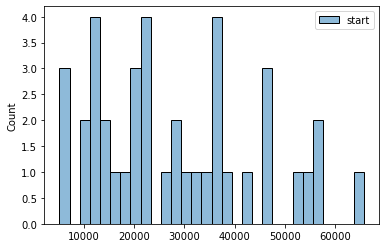

In [26]:
sns.histplot(high_density.sort_values('start', ascending = False
                        ), bins=30)

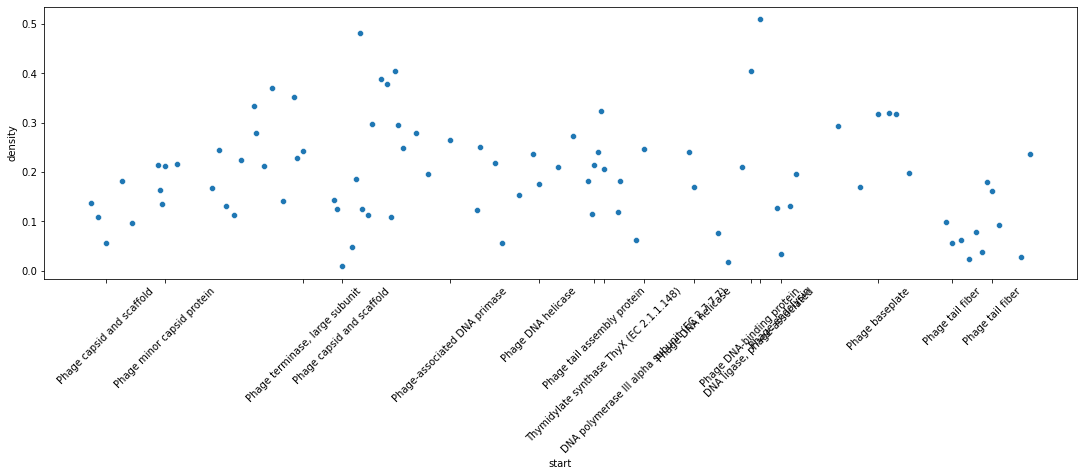

In [7]:
sns.scatterplot(data = mutations_per_db, x = 'start', y = 'density')
plt.xticks(high_low_df.loc[:, 'start'], high_low_df.loc[:, 'protein annotation'], rotation = 45)
fig = plt.gcf()
fig.set_size_inches(18.5, 5)
plt.show()

to what do we get a lot of mutations? -? answered in another sheet
make the decision tree

In [9]:
gr_filtered_snippy.div(total_mutations*100).sort_values('POS').reset
#sns.barplot(data = gr_filtered_snippy.div(total_mutations*100).sort_values('POS').reset_index(), x = 'protein annotation', y= 'POS')

AttributeError: 'DataFrame' object has no attribute 'reset'

In [ ]:
sns.scatterplot(data = plot_df, x = 'POS', y = 'CHROM')
#plt.ylalel('count')
plt.show()

In [ ]:
sns.displot(Pa10_myo_snippy_df)

In [ ]:
pos_Pa10_myo_snippy_df.loc[:, 'plot'] = [1]*pos_Pa10_myo_snippy_df.shape[0]
sns.scatterplot(data = pos_Pa10_myo_snippy_df, x = 'POS', y = 'plot')

In [ ]:
filt = snippy_df[snippy_df.loc[:, 'inter or intra'] == 'intra']
np.log10(filt.loc[:, 'QUAl'])

In [ ]:
sns.displot(np.log10(filt.loc[:, 'QUAl']))

In [ ]:
filt.loc[:, 'QUA1']